# 信息检索作业
选择一定量的文本数据集，计算TF-IDF，绘制曲线并分析

In [1]:
import re
import collections
from pathlib import Path
import numpy as np

## 读取文本数据

In [2]:
# 读取文本数据
def read_files(files_path):
    # 遍历路径下所有文件
    p = Path(files_path)
    files_num = 0
    files_names = []
    #lines = []
    texts = []
    # 寻找路径下所有文本文件
    for file in p.rglob('*.txt'):
        #print(file)
        #files_names.append(str(file))  # 记录文本文件名称
        files_num += 1  # 记录文本文件总数
        lines = ''
        with open(file, 'r', encoding = 'utf-8', errors='ignore') as f:
            # 按行处理，lower()将大写变为小写
            # re.sub()将用第三个属性的元素替换第二个属性的元素
            #lines.append([re.sub('[^a-z]+', ' ', line.lower()) for line in f])
            #print(f)
            for line in f:
                #print(line)
                lines += re.sub('[^a-z]+', ' ', line.lower()) + ' '
                #print(lines)
            texts.append(lines)
        #print(lines[files_num-1])
        #print(files_num)
    return files_num, texts

files_path = r'C:\Users\Lenovo\Desktop\河海大学\信息检索技术\作业\bbc'
files_num, texts = read_files(files_path)  # 读取文本数及每个文本的行数
print(files_num)
print('# sentences {}'.format(len(texts)))

2225
# sentences 2225


In [3]:
print(texts[0:5])
#print(lines[1511:1513])

['ad sales boost time warner profit    quarterly profits at us media giant timewarner jumped to bn m for the three months to december from m year earlier    the firm which is now one of the biggest investors in google benefited from sales of high speed internet connections and higher advert sales timewarner said fourth quarter sales rose to bn from bn its profits were buoyed by one off gains which offset a profit dip at warner bros and less users for aol    time warner said on friday that it now owns of search engine google but its own internet business aol had has mixed fortunes it lost subscribers in the fourth quarter profits were lower than in the preceding three quarters however the company said aol s underlying profit before exceptional items rose on the back of stronger internet advertising revenues it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aol s existing customers for high speed broadband timewa

## 分词

In [4]:
# 分词
def tokenize(sentences, token='word'):
    """Split sentences into word or char tokens"""
    if token == 'word':  # 在单词级别做分词
        return [sentence.split(' ') for sentence in sentences]
    elif token == 'char':
        return [list(sentence) for sentence in sentences]
    else:
        print('ERROR: unkown token type '+token)

'\ntokens = []\ntokens_whole = []\nfor n in range(files_num):\n    tokens.append(tokenize(lines[n]))\n    tokens_whole += tokens[n]\ntokens[0:4][0:4]\n'

In [5]:
tokens = tokenize(texts)
print(tokens[0:5])

[['ad', 'sales', 'boost', 'time', 'warner', 'profit', '', '', '', 'quarterly', 'profits', 'at', 'us', 'media', 'giant', 'timewarner', 'jumped', 'to', 'bn', 'm', 'for', 'the', 'three', 'months', 'to', 'december', 'from', 'm', 'year', 'earlier', '', '', '', 'the', 'firm', 'which', 'is', 'now', 'one', 'of', 'the', 'biggest', 'investors', 'in', 'google', 'benefited', 'from', 'sales', 'of', 'high', 'speed', 'internet', 'connections', 'and', 'higher', 'advert', 'sales', 'timewarner', 'said', 'fourth', 'quarter', 'sales', 'rose', 'to', 'bn', 'from', 'bn', 'its', 'profits', 'were', 'buoyed', 'by', 'one', 'off', 'gains', 'which', 'offset', 'a', 'profit', 'dip', 'at', 'warner', 'bros', 'and', 'less', 'users', 'for', 'aol', '', '', '', 'time', 'warner', 'said', 'on', 'friday', 'that', 'it', 'now', 'owns', 'of', 'search', 'engine', 'google', 'but', 'its', 'own', 'internet', 'business', 'aol', 'had', 'has', 'mixed', 'fortunes', 'it', 'lost', 'subscribers', 'in', 'the', 'fourth', 'quarter', 'profits

## 构建词典， 计算TF、IDF、TF-IDF权重

In [6]:
# 插入排序
def insertionSort(arr1, arr2):
    for i in range(len(arr1)):
        preIndex = i-1
        current1 = arr1[i]
        current2 = arr2[i]
        while preIndex >= 0 and arr1[preIndex] < current1:
            arr1[preIndex+1] = arr1[preIndex]
            arr2[preIndex+1] = arr2[preIndex]
            preIndex-=1
        arr1[preIndex+1] = current1
        arr2[preIndex+1] = current2
    return arr1, arr2

In [7]:
#构建词典
def count_corpus(sentences):
    tokens = [tk for st in sentences for tk in st]
    return collections.Counter(tokens)  # 返回一个字典，记录每个词的出现次数

class Vocab(object):
    def __init__(self, tokens):
        # tokens存放所有的词
        self.tokens = tokens
        counter = count_corpus(tokens)  # 记录词出现的次数，返回键值对 
        self.token_freqs = list(counter.items())  # 将词提取出构成列表
        #print(self.token_freqs)
        self.unk = 0
        self.idx_to_token = []
        self.idx_to_num = []
        self.idx_to_ni = []

        for token, freq in self.token_freqs:
            if token not in self.idx_to_token:
                self.idx_to_token.append(token)
                self.idx_to_num.append(freq)
                self.idx_to_ni.append(0)
                #print(token)
        #print(self.idx_to_token)
        #print(self.idx_to_num)
        self.token_to_idx = dict()
        self.token_to_num = dict()
        self.token_to_ni = dict()
        for idx, token in enumerate(self.idx_to_token):
            self.id.append(idx)
            #self.token_to_idx[token] = idx
            self.token_to_num[token] = self.idx_to_num[idx]
            for t in tokens:
                if token in t:
                    if token in self.token_to_ni:
                        self.token_to_ni[token] += 1
                    else: self.token_to_ni[token] = 1
            self.idx_to_ni[idx] = self.token_to_ni[token]
        # 计算TF值
        self.idx_to_tf = np.log2(np.array(self.idx_to_num)) + 1
        # 计算IDF值
        idf = len(self.idx_to_token)/np.array(self.idx_to_ni)
        idf[np.isinf(idf)] = 0
        self.idx_to_idf = np.log2(idf)
        self.idx_to_idf[np.isneginf(self.idx_to_idf)] = 0
        # 按TF值进行降序排序
        self.idx_to_tf, self.idx_to_idf = insertionSort(self.idx_to_tf, self.idx_to_idf)
        

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):  # 类索引；词到索引的映射，给定词，返回索引
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):  # 索引到词的映射，给定索引，返回词
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[indindicesex] for index in indices]
    
    def __getfreq__(self, tokens):  # 索引到词频的映射，给定索引，返回该词频率
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_num.get(tokens, self.unk)
        return [self.__getfreq__(token) for token in tokens]
    
    def __getfreqlist__(self):  # 获取词频列表：每个词对应的频率组成的列表
        return self.idx_to_num
    
    def __get_ni_list__(self):  # 获取文档频率列表
        return self.idx_to_ni

In [8]:
vocab = Vocab(tokens)
print(list(vocab.token_to_idx.items())[0:5])
print(list(vocab.token_to_num.items())[0:5])
print(list(vocab.token_to_ni.items())[0:5])

[]
[('ad', 20), ('sales', 494), ('boost', 157), ('time', 1322), ('warner', 26)]
[('ad', 18), ('sales', 204), ('boost', 127), ('time', 826), ('warner', 13)]


## 作曲线图
横坐标ki，纵坐标TF值、TF-IDF值

In [9]:
import matplotlib.pyplot as plt

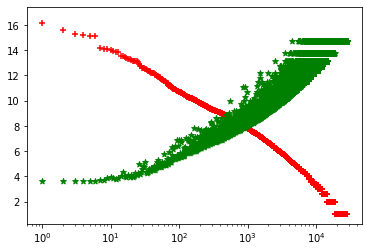

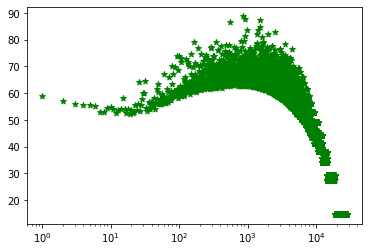

In [10]:
x = list(range(vocab.__len__()))
tf = vocab.idx_to_tf
idf = vocab.idx_to_idf
plt.xscale('log')
#plt.xscale('linear')
#plt.yscale('linear')
# TF曲线及IDF曲线
plt.scatter(x, tf, color='red', marker='+')
plt.scatter(x, idf, color='green', marker='*')
plt.show()
# TF-IDF曲线
tf_idf = np.multiply(np.array(tf),np.array(idf))
plt.xscale('log')
plt.scatter(x, tf_idf, color='green', marker='*')
plt.show()